<a href="https://colab.research.google.com/github/shyguuy/lab/blob/main/lab3/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 3

##Обработка пропущенных значений

Обработайте пропущенные значения:


* Удалите пропущенные значения
* Заполните при помощи медианы, среднего для числовых значений
* Заполните при помощи моды для категориальных значений
* Интерполируйте
Выведите статистку после каждого метода и объясните


In [1]:
!pip install scikit-learn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('cwurData.csv')
df
#df['broad_impact'].describe()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
df_cleaned = df.dropna() # удаление
df_cleaned

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
200,1,Harvard University,USA,1,1,1,1,1,1,1,1.0,2,100.00,2014
201,2,Stanford University,USA,2,11,2,4,5,3,3,4.0,6,99.09,2014
202,3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2.0,1,98.69,2014
203,4,University of Cambridge,United Kingdom,1,2,10,5,10,9,12,13.0,48,97.64,2014
204,5,University of Oxford,United Kingdom,2,7,12,10,11,12,11,12.0,16,97.51,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
df_median = df.fillna(df.median()) # Медиана
df_median
#df_median['broad_impact'].describe()

<ipython-input-38-db9353d72920>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median = df.fillna(df.median()) # Медиана


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
df_mean = df.fillna(df.mean()) #
df_mean
#df_mean['broad_impact'].describe()

<ipython-input-37-6e63ba7bb46a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = df.fillna(df.mean()) #


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0000,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0000,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0000,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0000,651,44.02,2015


In [ ]:
df_mode = df.fillna(df["broad_impact"].mode()[0]) # Мода
df_mode
#df_mode['broad_impact'].describe()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,642.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,642.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,642.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,642.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,642.0,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [ ]:
df_interpolated = df.interpolate() # Интерполяция
df_interpolated

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


**Объясните**

При "поверхностном" изучении таблицы можно увидеть, что уже в начале есть пустые значения в столбце "broad_impact". После удаления всех строк с  незаполненным столбцом "broad_impact" общее количество 'rows' сократилось с 2200 до 2000.

Заполнение 200 строк привели к следующим изменениям:

**Медиана**: уменьшено стандартное отклонение, уменьшен 75% квартиль, увеличен 25% квартиль;

**Среднее**: уменьшено стандартное отклонение, уменьшен 75% квартиль, увеличен 25% квартиль;

**Мода**: уменьшено стандартное отклонение, уменьшен 75% квартиль, увеличен 50% квартиль, увеличен 25% квартиль;

##Поиск выбросов и аномалий

**Те, кто выполняет задания со * делают поиск выбросов с помощью написанного ранее класса**

Найти выбросы по числовой переменной (использовать метод основанный на среднем и на межквартильном размахе). Объясните результат

Вывести статистику с выбросами и без. Сравните и объясните результат


In [42]:
df["score"].describe()

count    2200.000000
mean       47.798395
std         7.760806
min        43.360000
25%        44.460000
50%        45.100000
75%        47.545000
max       100.000000
Name: score, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d0240d11450>,
 'caps': [<matplotlib.lines.Line2D at 0x7d0240d11990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d0240d111b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d0240d11ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d0240d12170>],
 'means': []}

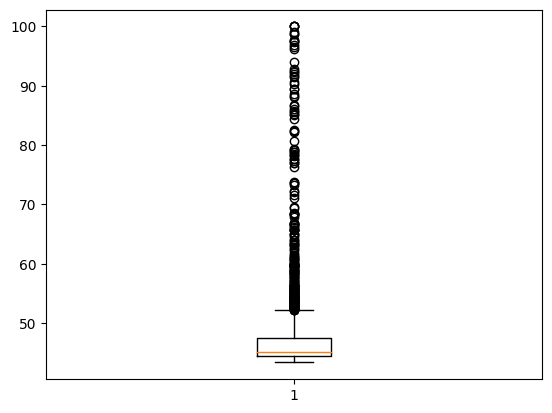

In [43]:
plt.boxplot(df["score"])

In [51]:
#Методом среднего
mean = df["score"].mean()
std_deviation = df["score"].std()
threshold = 3 * std_deviation

outliers = [x for x in df["score"] if abs(x - mean) > threshold]
df["score"].describe()


count    2200.000000
mean       56.732900
std        42.982661
min        44.020000
25%        44.470000
50%        45.120000
75%        47.765000
max       250.000000
Name: score, dtype: float64

In [52]:
print("Стандартное отклонение данных:", std_deviation)
print("Потенциальные выбросы:", outliers)

Стандартное отклонение данных: 42.98266138634938
Потенциальные выбросы: [250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0]


In [48]:
#При помощи межквартильного размаха
Q1 =  df["score"].quantile(0.25)
Q3 = df["score"].quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df["score"] > (Q1-1.5*IQR )) & (df["score"] < (Q3+1.5*IQR))]

df_IQR["score"].describe()

count    1909.000000
mean       45.672708
std         1.869076
min        44.020000
25%        44.430000
50%        44.850000
75%        46.240000
max        52.690000
Name: score, dtype: float64

**Объясните**

Отталкиваясь от данных, полученных после обработки датафреймов, можно сказать, что метод межквартильного размаха сильно срезает максимум, но при этом стандартное отклонение минимально.

##Дубликаты

Проверьте датафрейм на дубликаты и удалите их, если дублей нет - создайте.

In [53]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,441.927273,56.732900,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,264.920974,42.982661,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.020000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,225.750000,44.470000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.120000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.765000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,250.000000,2015.000000


In [63]:
#Проверка на дубли
duplicate_rows = df[df.duplicated()]
duplicate_rows

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,250,250.0,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,250,250.0,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,250,250.0,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,250,250.0,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,250,250.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,University of Nottingham,United Kingdom,6,101,101,87,101,101,101,NaN,250,250.0,2012
97,98,University of Bristol,United Kingdom,7,101,101,78,75,81,86,NaN,250,250.0,2012
98,99,Utrecht University,Netherlands,2,100,101,101,65,101,60,NaN,250,250.0,2012
99,100,Mines ParisTech,France,5,44,4,101,101,101,101,NaN,250,250.0,2012


In [64]:
#Удаление дублей
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,250,250.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,250,250.00,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,250,250.00,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,250,250.00,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,250,250.00,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


## Преобразование признаков

Масштабируйте числовые признаки через MinMaxScaler, StandardScaler

In [69]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler
min_max_scaler = MinMaxScaler()
df_min_max = df.copy()
num_features = df.select_dtypes(include=['int64']).columns
df_min_max[num_features] = min_max_scaler.fit_transform(df[num_features])
df_min_max["publications"].unique()

array([0.        , 0.01101101, 0.003003  , 0.01501502, 0.03603604,
       0.05205205, 0.01401401, 0.01301301, 0.01201201, 0.00500501,
       0.03303303, 0.02102102, 0.00800801, 0.00700701, 0.01001001,
       0.03903904, 0.02402402, 0.1001001 , 0.002002  , 0.00900901,
       0.04104104, 0.01801802, 0.01601602, 0.03403403, 0.01901902,
       0.02502503, 0.04004004, 0.02602603, 0.03803804, 0.02302302,
       0.001001  , 0.00600601, 0.03003003, 0.03103103, 0.07307307,
       0.004004  , 0.06706707, 0.03203203, 0.06006006, 0.04504505,
       0.02202202, 0.07007007, 0.05805806, 0.07207207, 0.01701702,
       0.04404404, 0.02902903, 0.08108108, 0.02802803, 0.07107107,
       0.04904905, 0.06306306, 0.04704705, 0.03503504, 0.03703704,
       0.02702703, 0.04604605, 0.08308308, 0.02002002, 0.07907908,
       0.05705706, 0.04304304, 0.05105105, 0.06906907, 0.0950951 ,
       0.04804805, 0.05305305, 0.08508509, 0.05905906, 0.07507508,
       0.08008008, 0.07807808, 0.06106106, 0.09009009, 0.06606

In [68]:
# StandardScaler
standard_scaler = StandardScaler()
df_std = df.copy()
df_std[num_features] = standard_scaler.fit_transform(df[num_features])
df_std["publications"].unique()

array([-1.43019831e+00, -1.39453357e+00, -1.42047156e+00, -1.38156457e+00,
       -1.31347734e+00, -1.26160135e+00, -1.38480682e+00, -1.38804907e+00,
       -1.39129132e+00, -1.41398707e+00, -1.32320408e+00, -1.36211108e+00,
       -1.40426032e+00, -1.40750257e+00, -1.39777582e+00, -1.30375059e+00,
       -1.35238433e+00, -1.10597338e+00, -1.42371381e+00, -1.40101807e+00,
       -1.29726609e+00, -1.37183782e+00, -1.37832232e+00, -1.31996183e+00,
       -1.36859557e+00, -1.34914208e+00, -1.30050834e+00, -1.34589983e+00,
       -1.30699284e+00, -1.35562658e+00, -1.42695606e+00, -1.41074482e+00,
       -1.33293083e+00, -1.32968858e+00, -1.19351411e+00, -1.41722931e+00,
       -1.21296761e+00, -1.32644633e+00, -1.23566335e+00, -1.28429709e+00,
       -1.35886883e+00, -1.20324086e+00, -1.24214785e+00, -1.19675636e+00,
       -1.37508007e+00, -1.28753934e+00, -1.33617308e+00, -1.16757612e+00,
       -1.33941533e+00, -1.19999861e+00, -1.27132809e+00, -1.22593660e+00,
       -1.27781259e+00, -

Масштабируйте категориальные признаки через OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

##Задание для гениев*


Реализовать расчет корреляции Спирмана

In [ ]:
#Функция по расчету тут

In [ ]:
#Пример использования тут и объяснение принципа работы

###Пример реализации

In [ ]:
import pandas as pd
import numpy as np


def corr_pearson(column_1, column_2):
  cov = np.cov(column_1, column_2)
  return cov/(column_1.std() * column_2.std())

In [ ]:
data = {
    'Рост': [170, 155, 180, 162, 175],
    'Вес': [65, 50, 75, 55, 70]
}
df = pd.DataFrame(data)
df

,Рост,Вес
0,170,65
1,155,50
2,180,75
3,162,55
4,175,70


In [ ]:
corr_pearson(df["Рост"], df["Вес"])

array([[0.96593129, 0.99674864],
       [0.99674864, 1.03527033]])